## Tutorial 22 - Propeller Simulation
Welcome to this tutorial on performing propeller simulations. This guide will walk you through the code, explain its components, and highlight where modifications can be made to customize the simulation for different designs.

---

## 1. Header and Imports


The **Imports** section is divided into two parts: general-purpose Python libraries and simulation-specific libraries.

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt   

## 2. RCAIDE Imports

The **RCAIDE Imports** section includes the core modules needed for the simulation. These libraries provide specialized classes and tools for building, analyzing, and running aircraft models.

### Key Imports:

1. **RCAIDE**: The core package is imported directly. This approach allows us to access specific classes and methods from RCAIDE without repeatedly importing individual components at the top of the script.

2. **`Units` Module**: The Units module is a standardized way to handle unit conversions within RCAIDE. It ensures consistent units across all inputs and outputs, reducing the likelihood of conversion errors.

3. **design_propeller**: This function is used to design a propeller based on given parameters. It takes a propeller object and sets its properties based on the inputs.

4. **rotor_aerodynamic_analysis**: This function performs the propeller aerodynamic analysis.


In [2]:

import RCAIDE
from RCAIDE.Framework.Core                              import Units
from RCAIDE.Library.Plots                               import *    
from RCAIDE.Library.Methods.Powertrain.Converters.Rotor import design_propeller 
from RCAIDE.Library.Methods.Performance                 import rotor_aerodynamic_analysis  



## 3. Propeller Design

This section defines the propeller that is to be analysed. 

After creating the propeller object (located at RCAIDE.Library.Components.Powertrain.Converters.Propeller()), the geommetry properties including number of blades and radii are set. 

Next, the design conditions for the propeller are set. These include the speed the propeller is designed to operate at, the tip Mach number, the angular velocity, the lift coefficient, the altitude, and the thrust. These parameters will come from prior analysis or design.

From here, the airfoils that are to be used are defined. In this case, two airfoils are used, one for the leading edge and one for the trailing edge. The airfoils are defined using the RCAIDE.Library.Components.Airfoils.Airfoil() class. The tag, coordinate_file, and polar_files properties are set for each airfoil. 

Finally, before exiting the function, the propeller is designed using the design_propeller function. This function takes the propeller object and completes the design of the propellery designing blade pitchnd more. Refer to the RCAIDE documentation for more information on the design_propeller function.

In [3]:
def design_test_propeller(): 
    
    prop                                     = RCAIDE.Library.Components.Powertrain.Converters.Propeller() 
    prop.number_of_blades                    = 3
    prop.number_of_engines                   = 1
    prop.tip_radius                          = 1.0668
    prop.hub_radius                          = 0.21336
    prop.cruise.design_freestream_velocity   = 49.1744
    prop.cruise.design_tip_mach              = 0.65
    prop.cruise.design_angular_velocity      = 207.16160479940007
    prop.cruise.design_Cl                    = 0.7
    prop.cruise.design_altitude              = 1. * Units.km 
    prop.cruise.design_thrust                = 3054.4809132125697
    
    # define first airfoil    
    ospath                                = os.path.abspath(os.path.join('Notebook'))
    separator                             = os.path.sep
    rel_path = os.path.dirname(ospath) + separator + '..' + separator + '..' + separator + 'VnV' + separator + 'Vehicles' + separator
    airfoil_1                                  = RCAIDE.Library.Components.Airfoils.Airfoil()
    airfoil_1.tag                              = 'NACA_4412' 
    airfoil_1.coordinate_file                  = rel_path + 'Airfoils' + separator + 'NACA_4412.txt'   # absolute path   
    airfoil_1.polar_files                      =[rel_path + 'Airfoils' + separator + 'Polars' + separator + 'NACA_4412_polar_Re_50000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'NACA_4412_polar_Re_100000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'NACA_4412_polar_Re_200000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'NACA_4412_polar_Re_500000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'NACA_4412_polar_Re_1000000.txt'] 
    prop.append_airfoil(airfoil_1)           # append first airfoil 
    
    # define  second airfoil 
    airfoil_2                                = RCAIDE.Library.Components.Airfoils.Airfoil()  
    airfoil_2.tag                            = 'Clark_Y' 
    airfoil_2.coordinate_file                =   rel_path + 'Airfoils' + separator + 'Clark_y.txt' 
    airfoil_2.polar_files                    = [ rel_path + 'Airfoils' + separator + 'Polars' + separator + 'Clark_y_polar_Re_50000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'Clark_y_polar_Re_100000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'Clark_y_polar_Re_200000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'Clark_y_polar_Re_500000.txt',
                                                 rel_path + 'Airfoils' + separator + 'Polars' + separator + 'Clark_y_polar_Re_1000000.txt'] 
    prop.append_airfoil(airfoil_2)          # append second airfoil 
    
    # define polar stations on rotor 
    prop.airfoil_polar_stations           = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1]
    design_propeller(prop)
    
    return prop 

## 4. Run Propeller Analysis

This block runs the entire analysis beginning with calling the design propeller outlined in section 3. It next defined operating conditions and including the range of aircraft airspeeds over which the analysis will be performed as well as the angular velocity of the propeller. Note how the units class is used to define the angular velocity to be in revolutions per minute (rpm).

The setup parameters are then passed to the rotor_aerodynamic_analysis function. This function performs the analysis of the propeller. It returns results of the analysis which are then plotted using the plot_rotor_disc_performance function. The propeller geometry is then plotted with the plot_3d_rotor function.


Plotting rotor


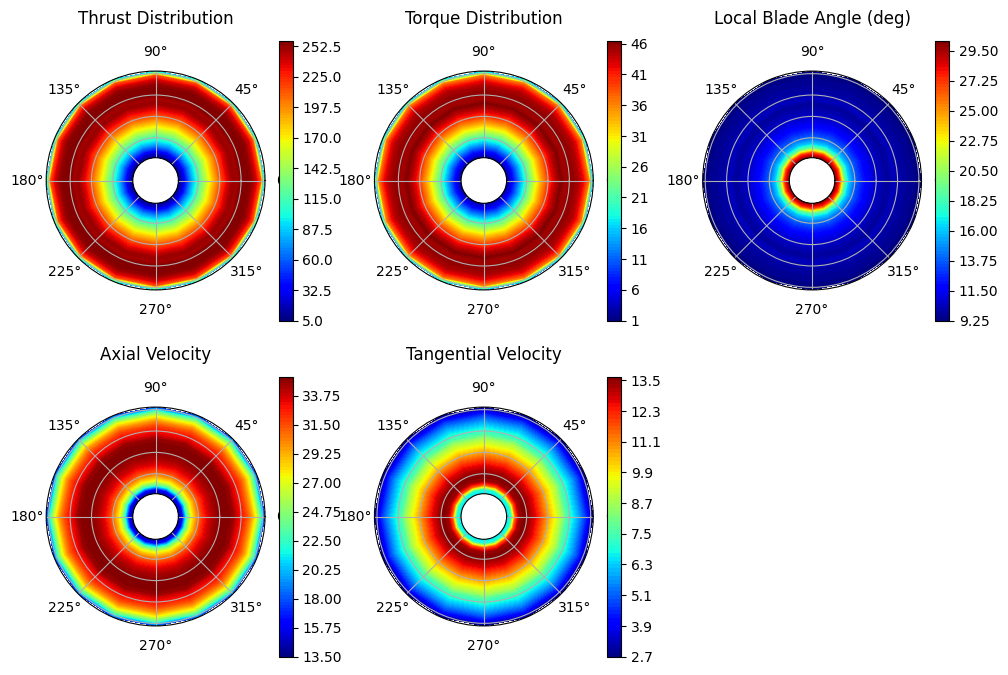

In [4]:
propeller      = design_test_propeller()

# define velocity range 
velocity_range =  np.linspace(10, 100, 29)

# define RPM
angular_velocity = 2500*Units.rpm

# run pr
results        = rotor_aerodynamic_analysis(propeller, velocity_range,
                                                angular_velocity = angular_velocity,
                                                blade_pitch_command = 0, 
                                                angle_of_attack = 0, 
                                                altitude = 0 ) 

    
plot_rotor_disc_performance(propeller,results,i=0,title=None,save_figure=False) 

# plot propeller 
plot_3d_rotor(propeller) 